Todos os caminhos de São Paulo a Uberaba:
Caminho: São Paulo -> Campinas -> Pirassununga -> Ribeirão Preto -> Uberaba, Distância: 485 km
Caminho: São Paulo -> Campinas -> São Carlos -> Ribeirão Preto -> Uberaba, Distância: 514 km
Caminho: São Paulo -> Mogi Guaçu -> Pirassununga -> Ribeirão Preto -> Uberaba, Distância: 515 km
Caminho: São Paulo -> Mogi Guaçu -> Pirassununga -> Campinas -> São Carlos -> Ribeirão Preto -> Uberaba, Distância: 774 km
Existe um caminho de São Paulo a Uberaba: True


C:\Users\anama\AppData\Local\Temp\ipykernel_40748\2528657145.py:72: UserWarning: 

The arrowstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(G, pos, edgelist=arestas, width=2, arrowstyle='-|>', arrowsize=20)
C:\Users\anama\AppData\Local\Temp\ipykernel_40748\2528657145.py:72: UserWarning: 

The arrowsize keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(G, pos, edgelist=arestas, width=2, arrowstyle='-|>', arrowsize=20)


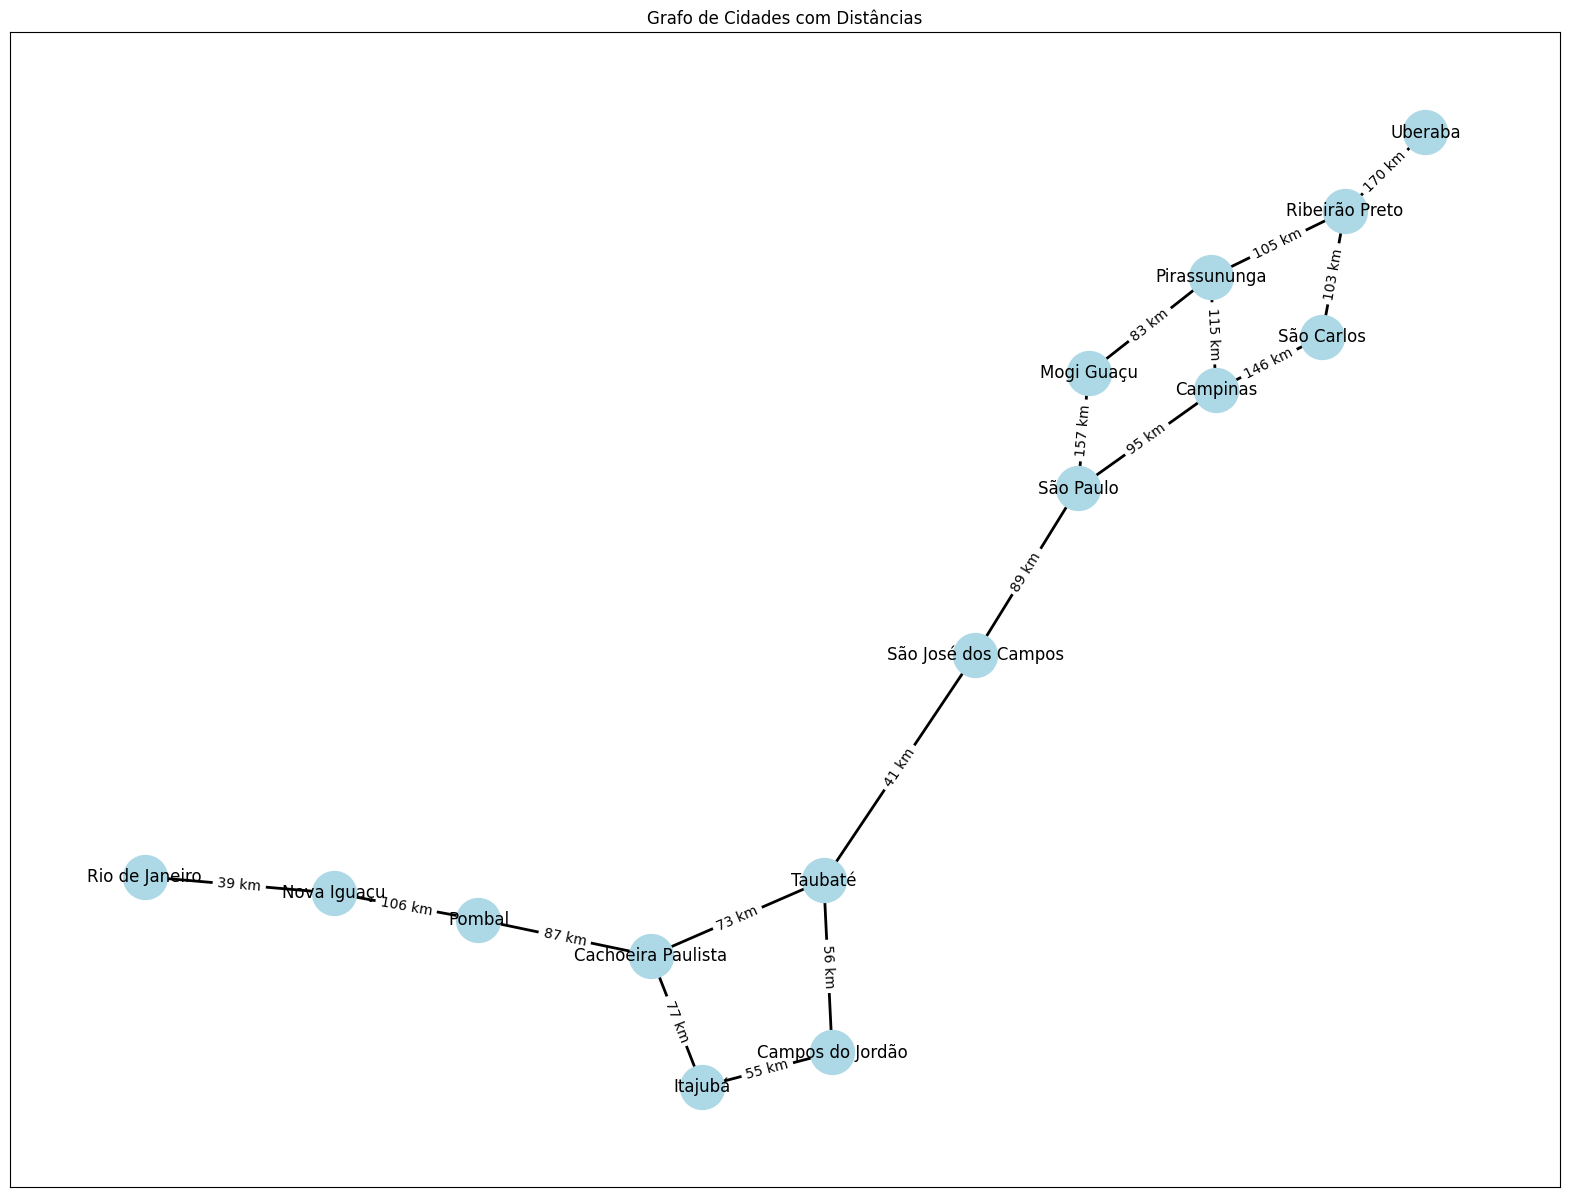

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
import pandas as pd


# Criação do grafo com cidades e pesos
def criar_grafo():
    G = nx.Graph()
    arq=pd.read_csv('distancias.csv')
    for index, row in arq.iterrows():
        origem = row['MUNICÍPIO ORIGEM']
        destino = row['MUNICÍPIO DESTINO']
        distancia = row['DISTÂNCIA TOTAL (km)']
        G.add_edge(origem, destino, weight=distancia)
    return G

# Busca em largura (BFS) para encontrar todos os caminhos possíveis (com pesos)
def bfs_todos_caminhos(G, inicio, objetivo):
    if inicio not in G or objetivo not in G:
        raise ValueError("Cidade inicial ou cidade final não estão no grafo")

    caminhos = []
    fila = deque([(inicio, [inicio], 0)])  # (nó atual, caminho, distância acumulada)
    visitados = set()

    while fila:
        no_atual, caminho, distancia_atual = fila.popleft()
        
        if no_atual == objetivo:
            caminhos.append((caminho, distancia_atual))
            continue  # Continue para explorar outros caminhos

        for vizinho in G.neighbors(no_atual):
            if vizinho not in caminho:  # Verifica se o vizinho já está no caminho atual
                peso_aresta = G[no_atual][vizinho]['weight']
                fila.append((vizinho, caminho + [vizinho], distancia_atual + peso_aresta))

    return caminhos

# Função para verificar se existe um caminho entre duas cidades
def existe_caminho(G, inicio, objetivo):
    caminhos = bfs_todos_caminhos(G, inicio, objetivo)
    return len(caminhos) > 0

# Exemplo de uso
G = criar_grafo()

cidade_inicio = 'São Paulo'
cidade_objetivo = 'Uberaba'

# Encontrar todos os caminhos
caminhos = bfs_todos_caminhos(G, cidade_inicio, cidade_objetivo)
if caminhos:
    print(f"Todos os caminhos de {cidade_inicio} a {cidade_objetivo}:")
    for caminho, distancia in caminhos:
        print(f"Caminho: {' -> '.join(caminho)}, Distância: {distancia} km")
else:
    print(f"Não existe caminho de {cidade_inicio} a {cidade_objetivo}")

# Verificar se existe um caminho
existe = existe_caminho(G, cidade_inicio, cidade_objetivo)
print(f"Existe um caminho de {cidade_inicio} a {cidade_objetivo}: {existe}")

# Visualização do grafo com pesos
pos = nx.spring_layout(G)
arestas = G.edges(data=True)

plt.figure(figsize=(20, 15))

nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='lightblue')
nx.draw_networkx_edges(G, pos, edgelist=arestas, width=2, arrowstyle='-|>', arrowsize=20)
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f'{d["weight"]} km' for u, v, d in arestas})

plt.title("Grafo de Cidades com Distâncias")
plt.show()
